# AML-3104 Assignment 1
### [30 Marks, 20%]

# Group name: ML Strike 3
Team Members:
Akash Guje: C0835384,
Lakhvir Singh: C0851353,
Naman Shah: C0853267,
Noah Raphael David: C0846073


## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

In [3]:
trainingset.shape

(28709, 2311)

In [4]:
testingset.shape

(3589, 2311)

## Split data

In [5]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [6]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


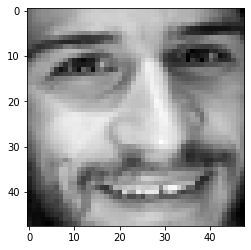

facial emotion: happy


In [7]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [34]:
# YOUR CODE HERE

def get_happysad_data(x,y):
    happysad_predictors_set = []
    happysad_target_set = []
    for i in range(y.shape[0]):
        if y.shape[0] == 1:
            indx = y[0]
        else:
            indx = np.argmax(y[i])
    
        #Checking for Emotions
        if indx == 3:  # Happy
            happysad_predictors_set.append(x[i]) #gets the feature set
            happysad_target_set.append(1) #gets the target set
        elif indx == 4:  # Sad
            happysad_predictors_set.append(x[i]) #gets the feature set
            happysad_target_set.append(0) #gets the target set
        else:
            continue
    return np.array(happysad_predictors_set),np.array(happysad_target_set)

In [35]:
x_training_happy_sad,y_training_happy_sad = get_happysad_data(x_training,y_training)

In [36]:
x_testing_happy_sad,y_testing_happy_sad = get_happysad_data(x_testing,y_testing)

In [37]:
print(x_training_happy_sad.shape)
print(y_training_happy_sad.shape)

print(x_testing_happy_sad.shape)
print(y_testing_happy_sad.shape)

(12045, 48, 48)
(12045,)
(1548, 48, 48)
(1548,)


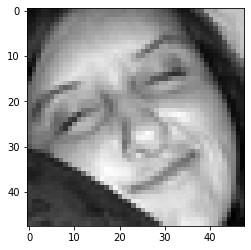

facial emotion: Happy


In [38]:
plt.imshow(x_training_happy_sad[5], cmap='gray')
plt.show()
if y_training_happy_sad[5] == 1:
    print('facial emotion: Happy')
else:
    print('facial emotion: Sad')

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [8]:
# YOUR CODE HERE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
#PCA Code

pca = PCA()

#get best number of components
data_2d_train = [i.flatten() for i in x_training_happy_sad]
data_2d_test = [i.flatten() for i in x_testing_happy_sad]
pca.fit(data_2d_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1 
print(d) 

243


In [41]:
pca = PCA(n_components=243)  # 243 is the optimal dimensions.

x_reduced_training_happy_sad_pca = pca.fit_transform(data_2d_train)
x_reduced_testing_happy_sad_pca = pca.transform(data_2d_test)

In [42]:
x_compressed = pca.inverse_transform(x_reduced_training_happy_sad_pca)
recovered_sample_pca = x_compressed[1].reshape([48,48])

In [43]:
cumsum_happy_sad = []
s = 0
for i in range(pca.n_components_):
    s += pca.explained_variance_ratio_[i]
    cumsum_happy_sad.append(s)

In [44]:
s

0.9497537889926178

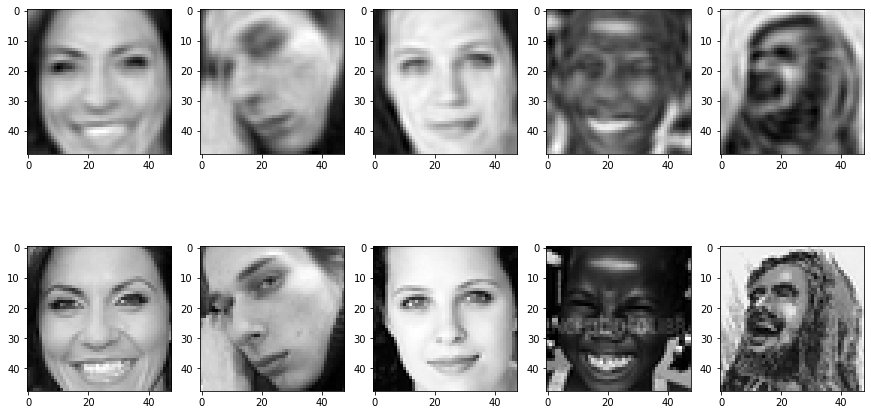

In [47]:
import random

# Compare and display 5 inversed PCA images and its original images
randomlist = random.sample(range(0,x_compressed.shape[0]), 5)

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x_compressed[randomlist[i], :].reshape(48,48), cmap='gray', )
    plt.subplot(2,5,i+6)
    plt.imshow(x_training_happy_sad[randomlist[i], :].reshape(48,48), cmap='gray')
plt.show()

In [50]:
#LDA Code 

lda = LinearDiscriminantAnalysis()
data_2d_train =  x_training_happy_sad.reshape(x_training_happy_sad.shape[0], -1)

#get best number of components
lda.fit(data_2d_train , y_training_happy_sad)
cumsum = np.cumsum(lda.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.98) +1 
print(d)

1


In [51]:
lda = LinearDiscriminantAnalysis(n_components=1)  # 1 is the optimal dimensions.

x_reduced_training_happy_sad_lda = lda.fit_transform(data_2d_train,y_training_happy_sad)
#x_reduced_testing_happy_sad_lda = lda.transform(data_2d_test,y_testing_happy_sad)

In [10]:
# define a inverse transform function for LDA 
def inverse_transform_LDA(lda, x):

    inv = np.linalg.pinv(lda.scalings_)

    org_img = np.dot(x, inv)+lda.xbar_

    return org_img


In [ ]:
# Perform inverse transform
inversed_lda = inverse_transform_LDA(lda,x_reduced_training_happy_sad_lda)
#inversed_lda

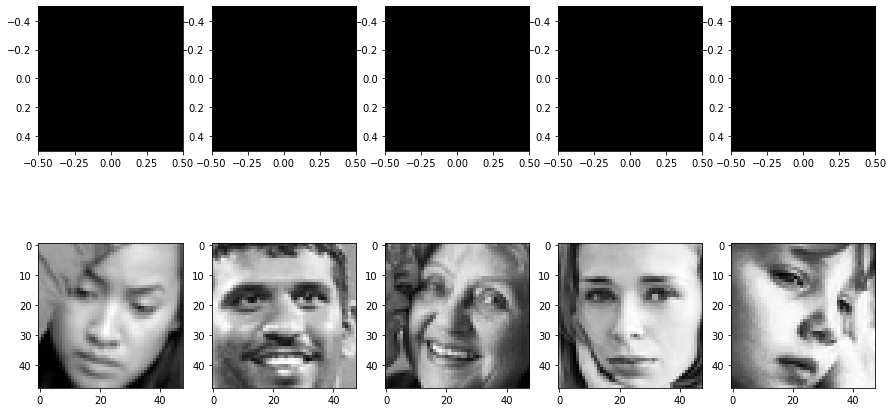

In [54]:
#Visulaize the LDA value
randomlist = random.sample(range(0,inversed_lda.shape[0]), 5)

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x_reduced_training_happy_sad_lda[randomlist[i]].reshape(1,-1), cmap='gray')
    plt.subplot(2,5,i+6)
    plt.imshow(x_training_happy_sad[randomlist[i], :], cmap='gray')
plt.show()

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [32]:
# YOUR CODE HERE

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(x_reduced_training_happy_sad_pca,y_training_happy_sad)

GaussianNB()

In [33]:
nb_model.score(x_reduced_testing_happy_sad_pca,y_testing_happy_sad)

0.5794573643410853

[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [34]:
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()

lg_model.fit(x_reduced_training_happy_sad_pca,y_training_happy_sad)

C:\Users\noahr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
lg_model.score(x_reduced_testing_happy_sad_pca,y_testing_happy_sad)

0.712532299741602

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [36]:
# YOUR CODE HERE

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(kernel='poly')
grid_param = {"C": [1,3,5,7], "coef0": [1,2,3]}
grid_model = GridSearchCV(svm_model, param_grid = grid_param,scoring='accuracy')

In [37]:
grid_model.fit(x_reduced_training_happy_sad_pca,y_training_happy_sad)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 3, 5, 7], 'coef0': [1, 2, 3]},
             scoring='accuracy')

In [282]:
grid_model.best_params_

{'C': 1, 'coef0': 1}

In [287]:
svm_model_best = SVC(kernel='poly',coef0=1,C=1)
svm_model_best.fit(x_reduced_training_happy_sad_pca,y_training_happy_sad)

SVC(C=1, coef0=1, kernel='poly')

In [289]:
svm_model_best.score(x_reduced_testing_happy_sad,y_testing_happy_sad)

0.7571059431524548

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

None of the approaches practiced above can be used to describe how sad or happy a picture is because the algorithms used above are only used for classifying images rather than producing an continuous output value which can quantify how sad or happy the picture is. To get that information we might have to use a regression algorithm like Linear regression to calculate a happy/sad score or we can output probabilty value of each of the images of the classification model by using predict_proba(). However, if it is asked about which approach would we trust to classify images then it would be Support Vector Machine, as it has more accuracy on test data compared to other algorithims. 

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [292]:
y_pred = svm_model_best.predict(x_reduced_testing_happy_sad[0:11,:])

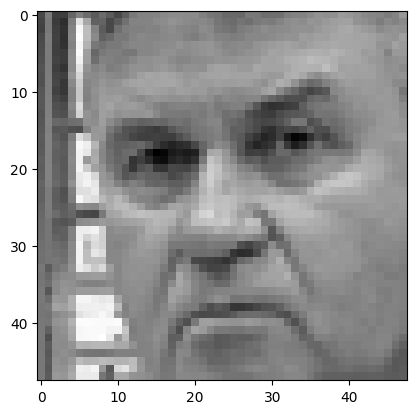

Predicted facial emotion: Sad


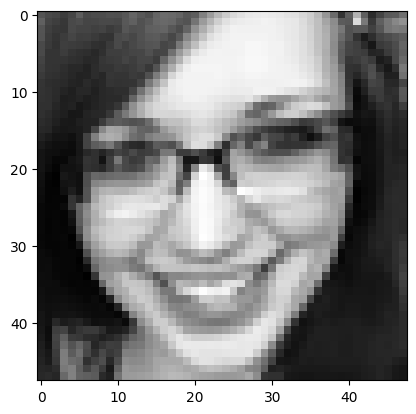

Predicted facial emotion: Happy


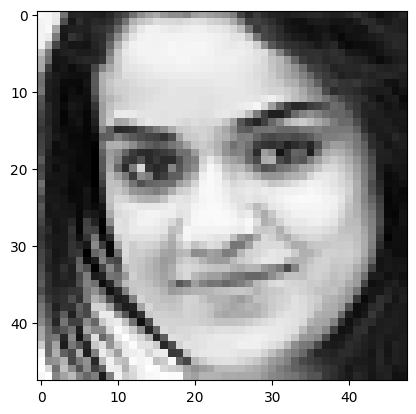

Predicted facial emotion: Sad


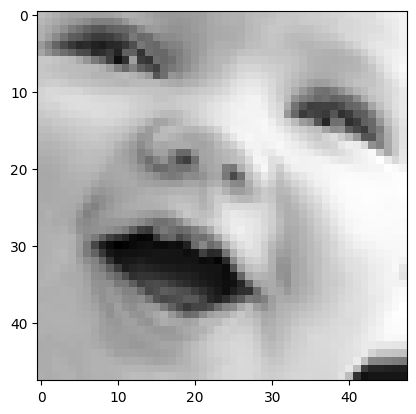

Predicted facial emotion: Happy


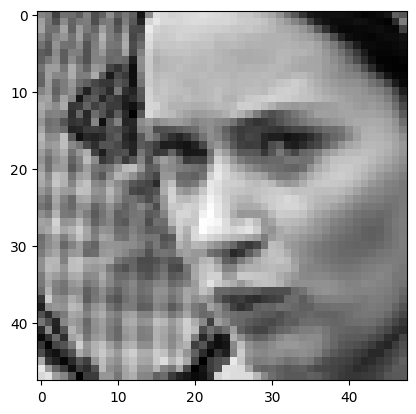

Predicted facial emotion: Sad


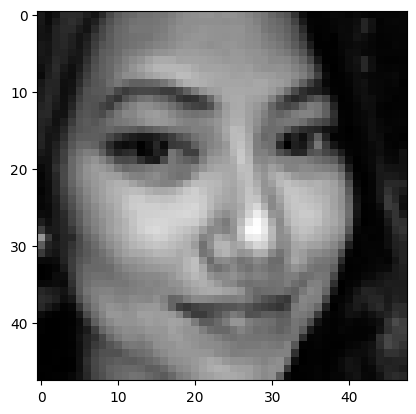

Predicted facial emotion: Happy


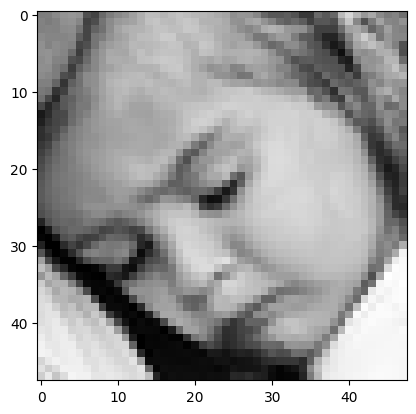

Predicted facial emotion: Happy


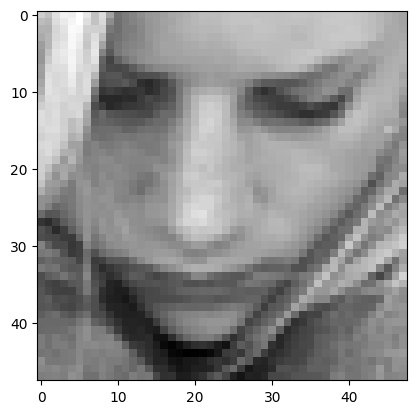

Predicted facial emotion: Sad


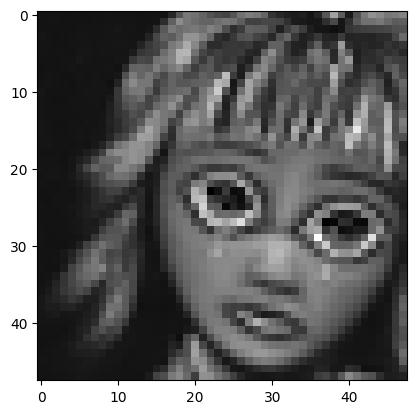

Predicted facial emotion: Sad


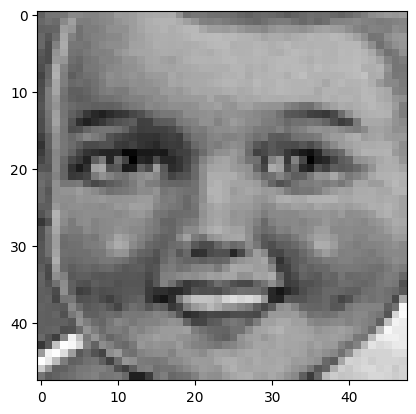

Predicted facial emotion: Happy


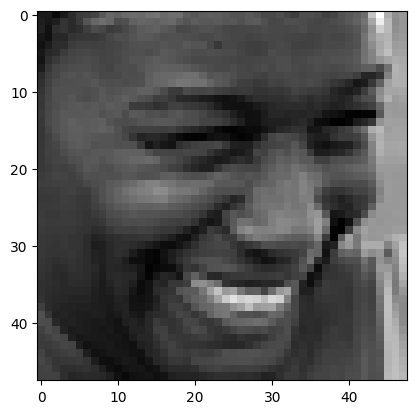

Predicted facial emotion: Happy


In [298]:
for i in range(11):
    plt.figure(i)
    plt.imshow(x_testing_happy_sad[i,:],cmap='gray')
    plt.show()
    if y_pred[i] == 1:
        print('Predicted facial emotion: Happy')
    else:
        print('Predicted facial emotion: Sad')

In [299]:
# YOUR CODE HERE

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [9]:
# YOUR CODE HERE

print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


In [16]:
def inverse_onehot(l):
    b = []
    for i in l:
        a = np.argmax(i)
        b.append(a)
    return b

In [17]:
for i in y_training:
    print(i)
    break

[1. 0. 0. 0. 0. 0. 0.]


In [18]:
y_training_inverse = inverse_onehot(y_training)
y_testing_inverse = inverse_onehot(y_testing)

In [19]:
y_training_inverse

[0,
 0,
 2,
 4,
 6,
 2,
 4,
 3,
 3,
 2,
 0,
 6,
 6,
 6,
 3,
 5,
 3,
 2,
 6,
 4,
 4,
 2,
 0,
 0,
 3,
 3,
 5,
 0,
 3,
 5,
 3,
 6,
 3,
 2,
 3,
 6,
 6,
 6,
 0,
 5,
 0,
 3,
 4,
 0,
 6,
 2,
 3,
 6,
 2,
 2,
 2,
 5,
 5,
 6,
 4,
 5,
 0,
 3,
 4,
 2,
 6,
 5,
 3,
 4,
 3,
 0,
 4,
 3,
 0,
 5,
 4,
 2,
 4,
 2,
 0,
 6,
 0,
 0,
 5,
 4,
 3,
 5,
 3,
 6,
 2,
 2,
 4,
 4,
 5,
 4,
 0,
 0,
 6,
 0,
 6,
 2,
 2,
 3,
 4,
 3,
 3,
 2,
 6,
 3,
 4,
 3,
 2,
 0,
 2,
 3,
 2,
 3,
 6,
 6,
 3,
 4,
 4,
 0,
 3,
 3,
 0,
 2,
 0,
 0,
 3,
 3,
 0,
 4,
 5,
 2,
 4,
 2,
 5,
 3,
 0,
 6,
 6,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 0,
 0,
 2,
 6,
 3,
 4,
 5,
 3,
 0,
 2,
 4,
 5,
 2,
 3,
 4,
 6,
 3,
 4,
 3,
 6,
 0,
 4,
 4,
 4,
 2,
 6,
 5,
 5,
 6,
 5,
 2,
 3,
 2,
 3,
 4,
 0,
 2,
 0,
 3,
 0,
 2,
 2,
 5,
 3,
 5,
 5,
 4,
 3,
 0,
 6,
 5,
 2,
 6,
 0,
 0,
 4,
 5,
 6,
 3,
 5,
 5,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 6,
 3,
 6,
 3,
 0,
 6,
 3,
 2,
 0,
 6,
 5,
 6,
 0,
 5,
 4,
 3,
 0,
 3,
 0,
 4,
 5,
 4,
 3,
 3,
 0,
 0,
 6,
 2,
 0,
 6,
 3,
 0,
 0,


In [20]:
data_2d_train = [i.flatten() for i in x_training]
data_2d_test = [i.flatten() for i in x_testing]

In [21]:
pca_total_dataset = PCA() 

x_reduced_training_pca = pca_total_dataset.fit_transform(data_2d_train)
x_reduced_testing_pca = pca_total_dataset.transform(data_2d_test)

In [18]:
cumsum = np.cumsum(pca_total_dataset.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1 
print(d) 

253


In [22]:
pca_total_dataset = PCA(n_components=253) 

x_reduced_training_pca = pca_total_dataset.fit_transform(data_2d_train)
x_reduced_testing_pca = pca_total_dataset.transform(data_2d_test)

In [23]:
cumsum = []
s = 0
for i in range(pca_total_dataset.n_components_):
    s += pca_total_dataset.explained_variance_ratio_[i]
    cumsum.append(s)

In [24]:
cumsum

[0.2892389249420219,
 0.38729980328323454,
 0.48186206859314423,
 0.5367129298573434,
 0.5671890125456207,
 0.5929650527729246,
 0.6147165153415188,
 0.6343916027174754,
 0.652232630914606,
 0.6673496065471957,
 0.6791030841710061,
 0.689739743122719,
 0.6999527844543312,
 0.7099614810948865,
 0.719201958796995,
 0.7273841645944703,
 0.7352767999917726,
 0.741869655366489,
 0.7473651075849197,
 0.7527307037242514,
 0.7580640430169476,
 0.7630622864156513,
 0.7679669824196672,
 0.7726232643935274,
 0.7770442907750584,
 0.7812140001872339,
 0.785309576844911,
 0.7891172202984112,
 0.7925685938732239,
 0.7959532166904225,
 0.7992152745577572,
 0.8023839967046508,
 0.8054875003612869,
 0.8085366045615419,
 0.8115388823981722,
 0.8143736088496379,
 0.8171191799248876,
 0.8196861000603781,
 0.8221794973057069,
 0.8246567120266758,
 0.8269597154624396,
 0.8291605415284223,
 0.831306329409662,
 0.833362098203202,
 0.8354050448404774,
 0.8374112019474395,
 0.8393311676158464,
 0.841162106766377

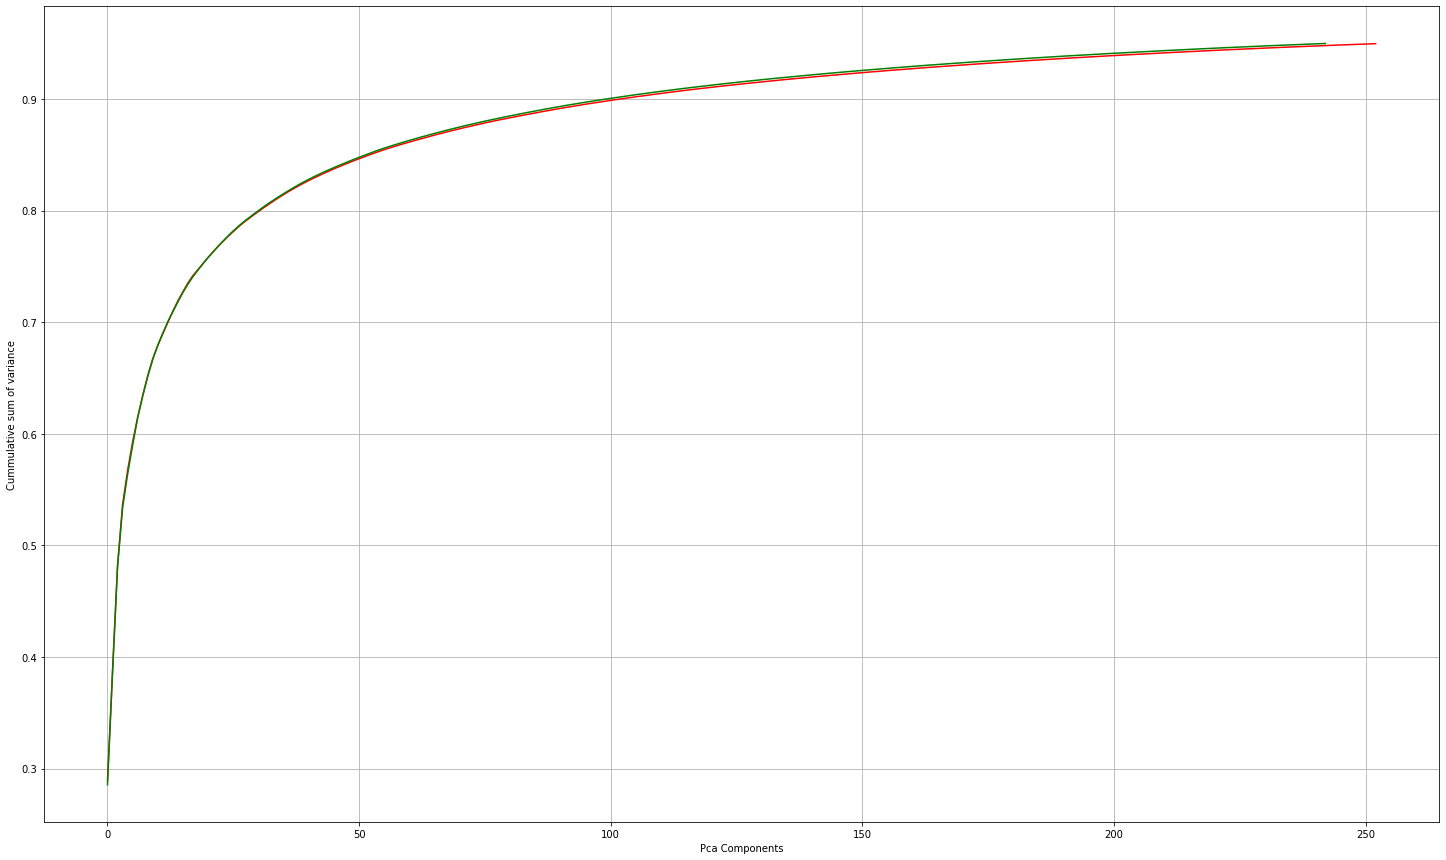

In [67]:
x = np.arange(0,pca_total_dataset.n_components_)
plt.figure(figsize=(25,15))
plt.plot(x,cumsum,color='r',label = 'Total Dataset')
plt.plot(x[:243],cumsum_happy_sad,color = 'g',label = 'Happy Sad Dataset')
plt.xlabel("Pca Components")
plt.ylabel("Cummulative sum of variance")
plt.grid()

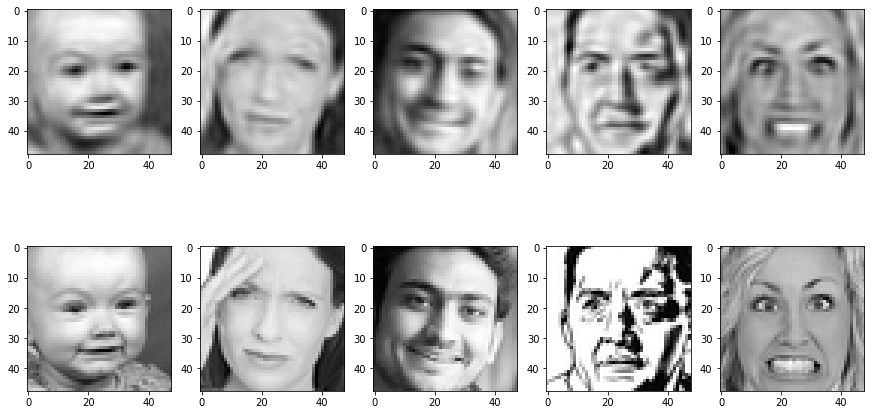

In [26]:
#sample few faces from each cases (PCA & LDA)
#PCA code
import random
x_compressed = pca_total_dataset.inverse_transform(x_reduced_training_pca)

randomlist = random.sample(range(0,x_compressed.shape[0]), 5)

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x_compressed[randomlist[i], :].reshape(48,48), cmap='gray')
    plt.subplot(2,5,i+6)
    plt.imshow(x_training[randomlist[i], :].reshape(48,48), cmap='gray')
plt.show()

In [27]:
#LDA Code 

lda_total_dataset = LinearDiscriminantAnalysis()

#get best number of components
lda_total_dataset.fit(data_2d_train , y_training_inverse)
cumsum = np.cumsum(lda_total_dataset.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.98) +1 
print(d)

6


In [28]:
lda_total_dataset = LinearDiscriminantAnalysis(n_components=6)  # 1 is the optimal dimensions.

x_reduced_total_lda = lda_total_dataset.fit_transform(data_2d_train,y_training_inverse)
#x_reduced_testing_happy_sad_lda = lda.transform(data_2d_test,y_testing_happy_sad)

In [29]:
lda_total_dataset.explained_variance_ratio_

array([0.34684495, 0.2054046 , 0.13566668, 0.11307777, 0.10552274,
       0.09348326])

In [30]:
inversed_lda = inverse_transform_LDA(lda_total_dataset,x_reduced_total_lda)
inversed_lda

array([[119.89614321, 117.47802509, 113.97453264, ..., 112.72003188,
        113.38884962, 114.35428678],
       [119.99137248, 117.68846641, 113.77446923, ..., 112.73478067,
        113.72112152, 114.08195387],
       [120.33793552, 117.55183601, 114.09619914, ..., 112.55650815,
        113.58669104, 114.4867051 ],
       ...,
       [120.52969218, 116.98065106, 114.27705211, ..., 112.75936418,
        113.26279101, 114.39732533],
       [120.64453146, 117.16195369, 114.19978553, ..., 112.76775521,
        113.25274948, 114.43825659],
       [120.33620386, 117.39660005, 114.04311625, ..., 112.62346061,
        113.63682527, 114.17554313]])

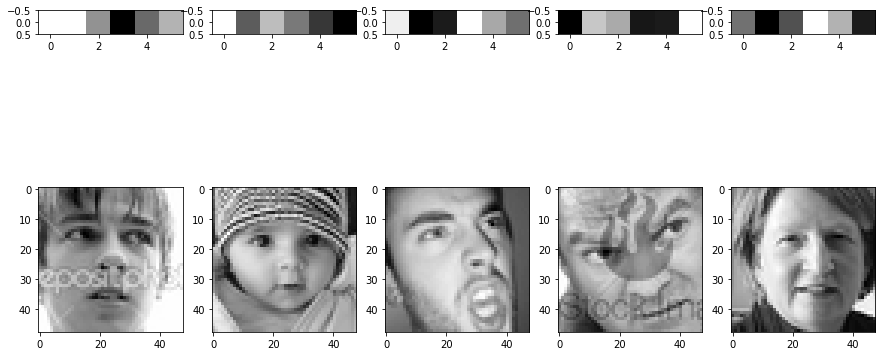

In [31]:
randomlist = random.sample(range(0,inversed_lda.shape[0]), 5)

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x_reduced_total_lda[randomlist[i]].reshape(1,-1), cmap='gray')
    plt.subplot(2,5,i+6)
    plt.imshow(x_training[randomlist[i], :], cmap='gray')
plt.show()

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [92]:
# YOUR CODE HERE


from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [106]:
nb_total_train_data = x_reduced_training_pca.reshape(-1,1)

In [108]:
scaled_total_dataset = MinMaxScaler(nb_total_train_data)

In [111]:
nb_model = MultinomialNB(alpha=1)

nb_model.fit(x_reduced_training_pca**2,y_training_inverse)

MultinomialNB(alpha=1)

In [112]:
nb_model.score(x_reduced_testing_pca,y_testing_inverse)

0.11061577040958484

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [118]:
y_pred_nb = nb_model.predict(x_reduced_testing_pca)

In [121]:
conf_mat = confusion_matrix(y_pred_nb,y_testing_inverse)

Text(33.0, 0.5, 'Predicted label')

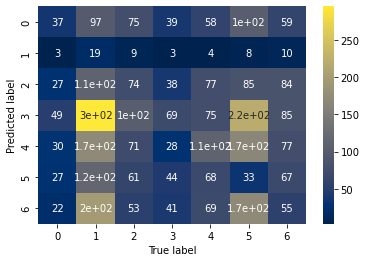

In [125]:
import seaborn as sns
sns.heatmap(conf_mat.T, annot=True, cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

The Naive bayes classifier is unabe to generalize the data well. Most of the disgust faces are classified as angry and surprise faces are classified as fear. Model is able to identify the fear, happy and neutral faces properly compared to other category faces although the False negative cases are greater in every case and mostly categorizing them as fear/ angry faces which makes it unfit for the  multi class problem.

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [161]:
# YOUR CODE HERE

from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(random_state=42)

lg_model.fit(x_reduced_training_pca,y_training_inverse)

C:\Users\noahr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [162]:
lg_model.score(x_reduced_testing_pca,y_testing_inverse)

0.36834772917247144

In [163]:
y_pred_lg = lg_model.predict(x_reduced_testing_pca)

In [164]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
conf_mat_lg = confusion_matrix(y_pred_lg,y_testing_inverse)

Text(33.0, 0.5, 'Predicted label')

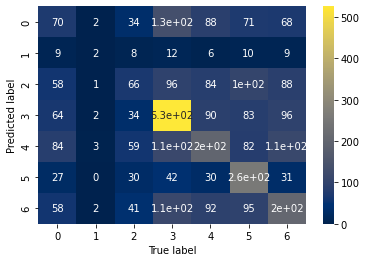

In [165]:
# YOUR CODE HERE
import seaborn as sns

sns.heatmap(conf_mat_lg.T, annot=True, cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Logistic Regression model is identfying the happy faces more accuratly but it's the false positive rate is 
high in the happy face category and the model is bad at identifing the disgust faces very badly almost 95% of disgusting 
faces date are not recognized ny the model. Compared to Naive bayes Logistic regression is better in idenfying the happy, sad, suprise and neutral faces well but it the model is not suited for this scenario.

In [16]:
# YOUR CODE HERE

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [135]:
# YOUR CODE HERE
svm_model_total = SVC(kernel='poly')
grid_param = {"C": [1,3,5,7], "coef0": [1,2,3]}
grid_model_total = GridSearchCV(svm_model_total, param_grid = grid_param,scoring='accuracy')

In [137]:
grid_model.fit(x_reduced_training_pca,y_training_inverse)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 3, 5, 7], 'coef0': [1, 2, 3]},
             scoring='accuracy')

In [138]:
grid_model.best_estimator_

SVC(C=1, coef0=1, kernel='poly')

In [139]:
grid_model.fit(x_reduced_training_pca,y_training_inverse)

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 3, 5, 7], 'coef0': [1, 2, 3]},
             scoring='accuracy')

In [140]:
grid_model.score(x_reduced_testing_pca,y_testing_inverse)

0.4555586514349401

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

In [141]:
y_pred_svm = grid_model.predict(x_reduced_testing_pca)

In [142]:
conf_mat_svm = confusion_matrix(y_pred_svm,y_testing_inverse)

Text(33.0, 0.5, 'Predicted label')

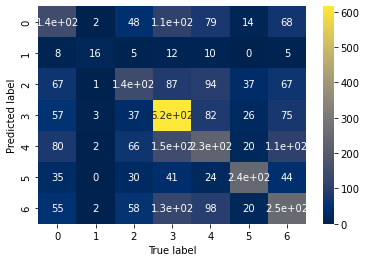

In [144]:
sns.heatmap(conf_mat_svm.T, annot=True, cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")


[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

SVM is able to better predict the faces in all categories as compared to other models. Happy faces and sad faces are most similar as the false positives count is high also neutral, suprise and angry faces are considered as similar faces by the model and disgust faces are least similar to any class.


[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [280]:
# YOUR CODE HERE

from sklearn.ensemble import IsolationForest

In [281]:
x_testing.shape

(3589, 48, 48)

In [282]:
s = x_testing.reshape(x_testing.shape[0],48*48)

In [283]:
detector = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42)
detector.fit(s)

IsolationForest(contamination=0.1, random_state=42)

In [284]:
train_scores = -detector.decision_function(s)

In [285]:
train_threshold = np.percentile(train_scores, 5)

In [286]:
train_is_mislabeled = train_scores < train_threshold

In [287]:
train_mislabeled_indices = np.where(train_is_mislabeled)[0]


In [301]:
print(f'Total mislabeled images in train set: {len(train_mislabeled_indices)}')


Total mislabeled images in train set: 180


In [288]:
train_mislabeled_indices

array([  39,   65,   67,   93,  106,  146,  153,  176,  181,  187,  199,
        259,  284,  285,  286,  319,  327,  333,  382,  409,  413,  428,
        436,  462,  502,  505,  523,  533,  617,  625,  642,  665,  681,
        733,  752,  793,  796,  806,  820,  842,  844,  864,  866,  868,
        912,  928,  935,  958,  983, 1005, 1017, 1148, 1163, 1165, 1168,
       1172, 1237, 1251, 1273, 1279, 1282, 1290, 1292, 1308, 1331, 1333,
       1353, 1355, 1368, 1374, 1409, 1414, 1419, 1420, 1426, 1448, 1455,
       1466, 1480, 1495, 1510, 1551, 1566, 1578, 1584, 1592, 1619, 1639,
       1656, 1686, 1729, 1730, 1814, 1822, 1825, 1830, 1839, 1854, 1868,
       1915, 1934, 1935, 1980, 1984, 1988, 2007, 2028, 2033, 2045, 2064,
       2071, 2107, 2110, 2117, 2118, 2149, 2183, 2251, 2288, 2292, 2296,
       2308, 2314, 2340, 2347, 2359, 2414, 2419, 2431, 2461, 2502, 2513,
       2529, 2543, 2553, 2579, 2602, 2605, 2627, 2629, 2676, 2739, 2749,
       2758, 2775, 2786, 2807, 2818, 2834, 2839, 28

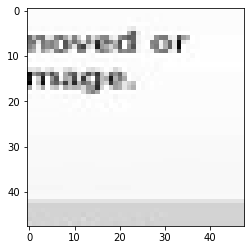

facial emotion: surprise


In [305]:
sampleindex = 3262
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :])) #3280,3,#2786,#3262,#3359

Since anomaly detection does not require labelled data to train a model, 
it can be an effective method for locating potentially incorrectly tagged photos in a dataset of various faces. 
This is significant because, in this instance, we are assuming that some of the faces were incorrectly 
tagged when the dataset was created, which means that we cannot trust the labels that are already in place.

Anomaly detection algorithms aim to identify instances that deviate significantly from the norm or expected 
behavior of the data. In this case, we can treat the majority of the images in the dataset 
as "normal" or "expected" behavior, and the potentially mislabeled images as anomalies. 
By training an anomaly detection model on the normal images, we can then use the model to 
detect images that are significantly different from the normal images, which may indicate 
that they are potentially mislabeled.

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [19]:
# YOUR CODE HERE